In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import calendar
import numpy as np
import os

file2019 = "2019.csv"
file2020 = "2020.csv"

crime_data2019 = pd.read_csv(file2019,low_memory=False)
crime_data2020 = pd.read_csv(file2020,low_memory=False)

In [3]:
crime_data2019.head()

,Unnamed: 0,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,22,2019571113,ASSAULT CONTACT-SEXUAL NATURE,902,Y,02/24/2019 09:00:00 PM,2019-02-24,2100.0,02/26/2019 04:00:00 PM,02/26/2019,...,17.77,N,03/06/2019,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,251,20191870265,DWI,2100,N,07/06/2019 03:28:00 AM,2019-07-06,328.0,07/06/2019 07:08:00 AM,07/06/2019,...,NaN,C,07/10/2019,NaN,NaN,3123140.0,3123140.0,30.233876,-97.715765,"(30.23387556, -97.71576502)"
2,336,20195009315,PROTECTIVE ORDER,3829,N,03/05/2019 04:47:00 PM,2019-03-05,1647.0,03/05/2019 04:47:00 PM,03/05/2019,...,NaN,N,03/05/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,342,2019602041,AGG ASLT STRANGLE/SUFFOCATE,410,Y,03/01/2019 11:55:00 PM,2019-03-01,2355.0,03/01/2019 11:55:00 PM,03/01/2019,...,18.49,C,03/02/2019,13A,Aggravated Assault,0.0,0.0,NaN,NaN,NaN
4,470,20191000704,BURGLARY OF RESIDENCE,500,N,04/09/2019 06:00:00 PM,2019-04-09,1800.0,04/10/2019 10:24:00 AM,04/10/2019,...,21.13,N,04/11/2019,220,Burglary,3137307.0,3137307.0,30.311622,-97.668747,"(30.31162194, -97.66874689)"


In [4]:
crime_data2020

,Unnamed: 0,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,287,20205011264,SUSPICIOUS PERSON,3403,N,03/19/2020 04:35:00 AM,2020-03-19,435.0,03/19/2020 10:46:00 AM,03/19/2020,...,NaN,NaN,NaN,NaN,NaN,3127385.0,3127385.0,30.423368,-97.697147,"(30.42336836, -97.69714681)"
1,308,20205009665,BURGLARY OF VEHICLE,601,N,03/06/2020 03:30:00 AM,2020-03-06,330.0,03/08/2020 10:22:00 AM,03/08/2020,...,NaN,N,03/16/2020,23F,Theft,3116318.0,3116318.0,30.232921,-97.737399,"(30.23292142, -97.73739875)"
2,967,2020741842,UNLAWFUL CARRYING WEAPON,1500,N,03/14/2020 11:08:00 PM,2020-03-14,2308.0,03/14/2020 11:08:00 PM,03/14/2020,...,NaN,C,03/15/2020,NaN,NaN,3123129.0,3123129.0,30.303287,-97.713917,"(30.30328695, -97.71391722)"
3,998,20201741205,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,06/23/2020 04:26:00 AM,2020-06-23,426.0,06/23/2020 04:26:00 AM,06/23/2020,...,NaN,NaN,NaN,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,1119,2020671670,CRIMINAL TRESPASS,2716,N,03/07/2020 10:00:00 PM,2020-03-07,2200.0,03/07/2020 10:00:00 PM,03/07/2020,...,NaN,NaN,NaN,NaN,NaN,3112984.0,3112984.0,30.265437,-97.747088,"(30.26543655, -97.74708803)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49066,2257585,2020780400,AUTO THEFT,700,N,03/18/2020 10:07:00 AM,2020-03-18,1007.0,03/18/2020 10:07:00 AM,03/18/2020,...,18.35,N,03/23/2020,240,Auto Theft,3140018.0,3140018.0,30.385045,-97.658117,"(30.38504521, -97.65811749)"
49067,2257594,2020951072,DWI,2100,N,04/04/2020 10:13:00 PM,2020-04-04,2213.0,04/04/2020 10:13:00 PM,04/04/2020,...,NaN,C,04/05/2020,NaN,NaN,3107822.0,3107822.0,30.438232,-97.758836,"(30.43823214, -97.75883565)"
49068,2257600,20205014196,DISTURBANCE - OTHER,3401,N,04/10/2020 03:46:00 PM,2020-04-10,1546.0,04/10/2020 04:46:00 PM,04/10/2020,...,24.22,NaN,NaN,NaN,NaN,3100503.0,3100503.0,30.189417,-97.788637,"(30.18941679, -97.78863679)"
49069,2257613,2020970960,FAMILY DISTURBANCE,3400,N,04/06/2020 05:08:00 PM,2020-04-06,1708.0,04/06/2020 05:08:00 PM,04/06/2020,...,NaN,NaN,NaN,NaN,NaN,3128170.0,3128170.0,30.349500,-97.696676,"(30.34950001, -97.69667616)"


In [5]:
runaway2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("RUNAWAY")]
print(f"runaway 2019: {len(runaway2019)}")

runaway2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("RUNAWAY")]
print(f"runaway 2020: {len(runaway2020)}")

runaway 2019: 992
runaway 2020: 656


In [6]:
animal2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("ANIMAL")]
print(f"animal 2019: {len(animal2019)}")

animal2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("ANIMAL")]
print(f"animal 2020: {len(animal2020)}")

animal 2019: 108
animal 2020: 85


In [7]:
kidnapping2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("KIDNAPPING")]
print(f"kidnapping 2019: {len(kidnapping2019)}")

kidnapping2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("KIDNAPPING")]
print(f"kidnapping 2020: {len(kidnapping2020)}")

kidnapping 2019: 10
kidnapping 2020: 0


In [8]:
weapon2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("WEAPON")]
print(f"weapon 2019: {len(weapon2019)}")

weapon2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("WEAPON")]
print(f"weapon 2020: {len(weapon2020)}")

weapon 2019: 429
weapon 2020: 457


In [9]:
# GATHER Highest Offense Descriptions that are drug related in order to combine similar offenses

In [10]:
drug2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("DRUG")]
print(f"drug 2019: {len(drug2019)}")

drug2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("DRUG")]
print(f"drug 2020: {len(drug2020)}")

drug 2019: 552
drug 2020: 599


In [11]:
narcotic2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("NARCOTIC")]
print(f"narcotic 2019: {len(narcotic2019)}")

narcotic2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("NARCOTIC")]
print(f"narcotic 2020: {len(narcotic2020)}")

narcotic 2019: 1179
narcotic 2020: 703


In [12]:
alcohol2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("ALCOHOL")]
print(f"alcohol 2019: {len(alcohol2019)}")

alcohol2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("ALCOHOL")]
print(f"alcohol 2020: {len(alcohol2020)}")

alcohol 2019: 45
alcohol 2020: 20


In [13]:
tobacco2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("TOBACCO")]
print(f"tobacco 2019: {len(tobacco2019)}")

tobacco2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("TOBACCO")]
print(f"tobacco 2020: {len(tobacco2020)}")

tobacco 2019: 2
tobacco 2020: 2


In [14]:
marijuana2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("MARIJUANA")]
print(f"marijuana 2019: {len(marijuana2019)}")

marijuana2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("MARIJUANA")]
print(f"marijuana 2020: {len(marijuana2020)}")

marijuana 2019: 756
marijuana 2020: 422


In [15]:
marijuana2019.columns

Index(['Unnamed: 0', 'Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [16]:
# Check to see if there are any values with mispelled or similar values in "Offense Type"
crime_data2019["Highest Offense Description"].value_counts()

BURGLARY OF VEHICLE               5968
FAMILY DISTURBANCE                5106
THEFT                             4730
CRIMINAL MISCHIEF                 2752
ASSAULT W/INJURY-FAM/DATE VIOL    1710
                                  ... 
MANF CONTROLLED SUB - OTHER          1
DEL OF DANG DRUG                     1
MAKING TOBACCO AVAIL TO MINOR        1
FIREARMS ON SCHOOL PROP              1
PERJURY                              1
Name: Highest Offense Description, Length: 299, dtype: int64

In [17]:
# Combining similar offenses together
drug2019_clean_df = crime_data2019.replace(
    {"VOCO - ALCOHOL  CONSUMPTION": "Drug Related", "VIOL CITY ORDINANCE - SMOKING": "Drug Related", "TOBACCO VIOL - UNDER AGE 17": "Drug Related", "POSSESSION OF MARIJUANA": "Drug Related", "POSS SYNTHETIC MARIJUANA": "Drug Related", "POSS OF PRESCRIPTION FORM": "Drug Related", "POSS OF DRUG PARAPHERNALIA": "Drug Related", "POSS OF ALCOHOL-AGE 16 & UNDER": "Drug Related", "POSS OF ALCOHOL - AGE 17 TO 20": "Drug Related", "POSS DANG DRUG": "Drug Related", "POSS CONTROLLED SUB/SYN NARC": "Drug Related", "POSS CONTROLLED SUB/OTHER": "Drug Related", "OBTAIN DANG DRUG BY FRAUD": "Drug Related", "MANF CONTROLLED SUB - OTHER": "Drug Related", "MAKING TOBACCO AVAIL TO MINOR": "Drug Related", "LIQUOR LAW VIOLATION/OTHER": "Drug Related", "DEL SYNTHETIC MARIJUANA": "Drug Related", "DEL OF DANG DRUG": "Drug Related", "DEL MARIJUANA": "Drug Related", "DEL CONTROLLED SUB/SYN NARC": "Drug Related", "DEL CONTROLLED SUB/NARCOTIC": "Drug Related", " CONTROLLED SUB VIOL - OTHER": "Drug Related"})
drug2019_clean_df

,Unnamed: 0,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,22,2019571113,ASSAULT CONTACT-SEXUAL NATURE,902,Y,02/24/2019 09:00:00 PM,2019-02-24,2100.0,02/26/2019 04:00:00 PM,02/26/2019,...,17.77,N,03/06/2019,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,251,20191870265,DWI,2100,N,07/06/2019 03:28:00 AM,2019-07-06,328.0,07/06/2019 07:08:00 AM,07/06/2019,...,NaN,C,07/10/2019,NaN,NaN,3123140.0,3123140.0,30.233876,-97.715765,"(30.23387556, -97.71576502)"
2,336,20195009315,PROTECTIVE ORDER,3829,N,03/05/2019 04:47:00 PM,2019-03-05,1647.0,03/05/2019 04:47:00 PM,03/05/2019,...,NaN,N,03/05/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,342,2019602041,AGG ASLT STRANGLE/SUFFOCATE,410,Y,03/01/2019 11:55:00 PM,2019-03-01,2355.0,03/01/2019 11:55:00 PM,03/01/2019,...,18.49,C,03/02/2019,13A,Aggravated Assault,0.0,0.0,NaN,NaN,NaN
4,470,20191000704,BURGLARY OF RESIDENCE,500,N,04/09/2019 06:00:00 PM,2019-04-09,1800.0,04/10/2019 10:24:00 AM,04/10/2019,...,21.13,N,04/11/2019,220,Burglary,3137307.0,3137307.0,30.311622,-97.668747,"(30.31162194, -97.66874689)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52761,2257428,20191670210,FAMILY DISTURBANCE,3400,N,06/16/2019 02:21:00 AM,2019-06-16,221.0,06/16/2019 02:21:00 AM,06/16/2019,...,24.31,N,11/21/2019,NaN,NaN,3117980.0,3117980.0,30.190296,-97.733282,"(30.19029582, -97.73328214)"
52762,2257456,2019551195,AGG ASLT STRANGLE/SUFFOCATE,410,Y,02/24/2019 04:44:00 PM,2019-02-24,1644.0,02/24/2019 04:44:00 PM,02/24/2019,...,19.00,C,02/24/2019,13A,Aggravated Assault,3064189.0,3064189.0,30.259883,-97.901829,"(30.25988292, -97.90182915)"
52763,2257457,20191932027,WARRANT ARREST NON TRAFFIC,3442,N,07/12/2019 10:40:00 PM,2019-07-12,2240.0,07/12/2019 10:40:00 PM,07/12/2019,...,21.11,NaN,NaN,NaN,NaN,3134239.0,3134239.0,30.253582,-97.680068,"(30.25358182, -97.6800683)"
52764,2257524,20191261939,TERRORISTIC THREAT-FAM/DAT VIO,2704,Y,05/06/2019 02:00:00 PM,2019-05-06,1400.0,05/07/2019 12:27:00 AM,05/07/2019,...,24.33,N,05/28/2019,NaN,NaN,3156400.0,3156400.0,30.172937,-97.612133,"(30.172937, -97.61213257)"


In [18]:
# Combining similar offenses together
drug2020_clean_df = crime_data2020.replace(
    {"VOCO - ALCOHOL  CONSUMPTION": "Drug Related", "VIOL CITY ORDINANCE - SMOKING": "Drug Related", "TOBACCO VIOL - UNDER AGE 17": "Drug Related", "POSSESSION OF MARIJUANA": "Drug Related", "POSS SYNTHETIC MARIJUANA": "Drug Related", "POSS OF PRESCRIPTION FORM": "Drug Related", "POSS OF DRUG PARAPHERNALIA": "Drug Related", "POSS OF ALCOHOL-AGE 16 & UNDER": "Drug Related", "POSS OF ALCOHOL - AGE 17 TO 20": "Drug Related", "POSS DANG DRUG": "Drug Related", "POSS CONTROLLED SUB/SYN NARC": "Drug Related", "POSS CONTROLLED SUB/OTHER": "Drug Related", "OBTAIN DANG DRUG BY FRAUD": "Drug Related", "MANF CONTROLLED SUB - OTHER": "Drug Related", "MAKING TOBACCO AVAIL TO MINOR": "Drug Related", "LIQUOR LAW VIOLATION/OTHER": "Drug Related", "DEL SYNTHETIC MARIJUANA": "Drug Related", "DEL OF DANG DRUG": "Drug Related", "DEL MARIJUANA": "Drug Related", "DEL CONTROLLED SUB/SYN NARC": "Drug Related", "DEL CONTROLLED SUB/NARCOTIC": "Drug Related", " CONTROLLED SUB VIOL - OTHER": "Drug Related"})
drug2020_clean_df

,Unnamed: 0,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,287,20205011264,SUSPICIOUS PERSON,3403,N,03/19/2020 04:35:00 AM,2020-03-19,435.0,03/19/2020 10:46:00 AM,03/19/2020,...,NaN,NaN,NaN,NaN,NaN,3127385.0,3127385.0,30.423368,-97.697147,"(30.42336836, -97.69714681)"
1,308,20205009665,BURGLARY OF VEHICLE,601,N,03/06/2020 03:30:00 AM,2020-03-06,330.0,03/08/2020 10:22:00 AM,03/08/2020,...,NaN,N,03/16/2020,23F,Theft,3116318.0,3116318.0,30.232921,-97.737399,"(30.23292142, -97.73739875)"
2,967,2020741842,UNLAWFUL CARRYING WEAPON,1500,N,03/14/2020 11:08:00 PM,2020-03-14,2308.0,03/14/2020 11:08:00 PM,03/14/2020,...,NaN,C,03/15/2020,NaN,NaN,3123129.0,3123129.0,30.303287,-97.713917,"(30.30328695, -97.71391722)"
3,998,20201741205,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,06/23/2020 04:26:00 AM,2020-06-23,426.0,06/23/2020 04:26:00 AM,06/23/2020,...,NaN,NaN,NaN,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,1119,2020671670,CRIMINAL TRESPASS,2716,N,03/07/2020 10:00:00 PM,2020-03-07,2200.0,03/07/2020 10:00:00 PM,03/07/2020,...,NaN,NaN,NaN,NaN,NaN,3112984.0,3112984.0,30.265437,-97.747088,"(30.26543655, -97.74708803)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49066,2257585,2020780400,AUTO THEFT,700,N,03/18/2020 10:07:00 AM,2020-03-18,1007.0,03/18/2020 10:07:00 AM,03/18/2020,...,18.35,N,03/23/2020,240,Auto Theft,3140018.0,3140018.0,30.385045,-97.658117,"(30.38504521, -97.65811749)"
49067,2257594,2020951072,DWI,2100,N,04/04/2020 10:13:00 PM,2020-04-04,2213.0,04/04/2020 10:13:00 PM,04/04/2020,...,NaN,C,04/05/2020,NaN,NaN,3107822.0,3107822.0,30.438232,-97.758836,"(30.43823214, -97.75883565)"
49068,2257600,20205014196,DISTURBANCE - OTHER,3401,N,04/10/2020 03:46:00 PM,2020-04-10,1546.0,04/10/2020 04:46:00 PM,04/10/2020,...,24.22,NaN,NaN,NaN,NaN,3100503.0,3100503.0,30.189417,-97.788637,"(30.18941679, -97.78863679)"
49069,2257613,2020970960,FAMILY DISTURBANCE,3400,N,04/06/2020 05:08:00 PM,2020-04-06,1708.0,04/06/2020 05:08:00 PM,04/06/2020,...,NaN,NaN,NaN,NaN,NaN,3128170.0,3128170.0,30.349500,-97.696676,"(30.34950001, -97.69667616)"


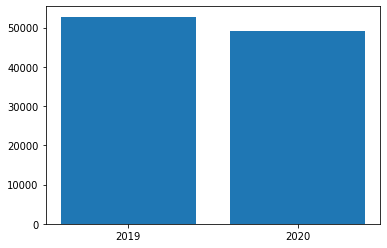

In [19]:
plt.bar(["2019","2020"], [len(drug2019_clean_df), len(drug2020_clean_df)])
plt.show()

In [20]:
#Grab only a few needed columns from main data set for line graphs
crime_data_selection_2019 = crime_data2019[["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", "Occurred Date", "Occurred Time", "Report Date Time", "Location Type", "Address", "Zip Code"]]
crime_data_selection_2019 = crime_data_selection_2019.copy()
crime_data_selection_2019["Month Occurred"] = pd.DatetimeIndex(crime_data_selection_2019["Occurred Date"]).month
crime_data_selection_2019["Month Occurred"] = crime_data_selection_2019["Month Occurred"].apply(lambda x: calendar.month_name[x])
crime_data_selection_months_2019 = crime_data_selection_2019[["Highest Offense Description","Month Occurred"]]

crime_data_selection_2020 = crime_data2020[["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", "Occurred Date", "Occurred Time", "Report Date Time", "Location Type", "Address", "Zip Code"]]
crime_data_selection_2020 = crime_data_selection_2020.copy()
crime_data_selection_2020["Month Occurred"] = pd.DatetimeIndex(crime_data_selection_2020["Occurred Date"]).month
crime_data_selection_2020["Month Occurred"] = crime_data_selection_2020["Month Occurred"].apply(lambda x: calendar.month_name[x])
crime_data_selection_months_2020 = crime_data_selection_2020[["Highest Offense Description","Month Occurred"]]

In [21]:
cardabuse2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("CARD ABUSE")]
print(f"card abuse 2019: {len(cardabuse2019)}")

cardabuse2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("CARD ABUSE")]
print(f"card abuse 2020: {len(cardabuse2020)}")

card abuse 2019: 858
card abuse 2020: 666


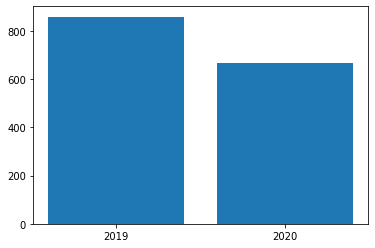

In [22]:
plt.bar(["2019","2020"], [len(cardabuse2019), len(cardabuse2020)])
plt.show()

In [23]:
identitytheft2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("IDENTITY THEFT")]
print(f"identitytheft2019: {len(identitytheft2019)}")

identitytheft2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("IDENTITY THEFT")]
print(f"identitytheft 2020: {len(identitytheft2020)}")

identitytheft2019: 481
identitytheft 2020: 575


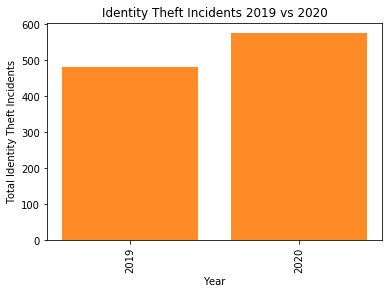

In [48]:
plt.bar(["2019","2020"], [len(identitytheft2019), len(identitytheft2020)], color='tab:orange', alpha=0.9, align="center")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Total Identity Theft Incidents")
plt.title("Identity Theft Incidents 2019 vs 2020")
plt.savefig('identitytheft.bar.png')
plt.show()

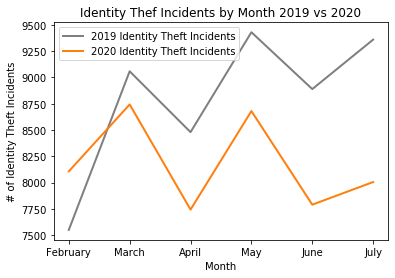

In [49]:
#Convert object occurred date to timestamp
#crime_data_df["Occurred Date"] = pd.to_datetime(crime_data_df["Occurred Date"])
#crime_data_df["Occurred Date"] = pd.arrays.DatetimeArray(crime_data_df["Occurred Date"])
identitythef2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("IDENTITY THEFT")]
identitythef2019bymonth = crime_data_selection_months_2019.groupby("Month Occurred").count()

identitythef2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("IDENTITY THEFT")]
identitythef2020bymonth = crime_data_selection_months_2020.groupby("Month Occurred").count()

month_order = ['February', 'March', 'April', 'May', 'June', 'July']
identitythef_by_month_2019 = identitythef2019bymonth.reindex(month_order, axis=0)
identitythef_by_month_2020 = identitythef2020bymonth.reindex(month_order, axis=0)

plt.plot(identitythef_by_month_2019,label='2019 Identity Theft Incidents', linewidth=2,color='tab:gray')
plt.plot(identitythef_by_month_2020,label='2020 Identity Theft Incidents', linewidth=2,color='tab:orange')
plt.legend()
plt.xlabel("Month")
plt.ylabel("# of Identity Theft Incidents")
plt.title("Identity Thef Incidents by Month 2019 vs 2020")
plt.savefig('identity theft.line.png')
plt.show()

In [26]:
fraud2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("FRAUD")]
print(f"fraud 2019: {len(fraud2019)}")

fraud2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("FRAUD")]
print(f"fraud 2020: {len(fraud2020)}")

fraud 2019: 770
fraud 2020: 804


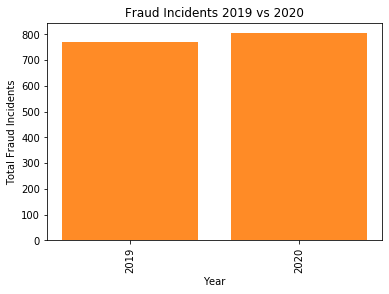

In [47]:
plt.bar(["2019","2020"], [len(fraud2019), len(fraud2020)], color='tab:orange', alpha=0.9, align="center")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Total Fraud Incidents")
plt.title("Fraud Incidents 2019 vs 2020")
plt.savefig('fraud.bar.png')
plt.show()

In [28]:
solicitation2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("SOLICITATION")]
print(f"solicitation 2019: {len(solicitation2019)}")

solicitation2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("SOLICITATION")]
print(f"solicitation 2020: {len(solicitation2020)}")

solicitation 2019: 40
solicitation 2020: 11


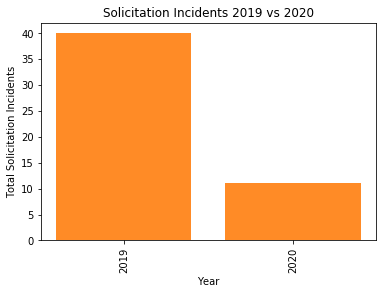

In [43]:
plt.bar(["2019","2020"], [len(solicitation2019), len(solicitation2020)], color='tab:orange', alpha=0.9, align="center")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Total Solicitation Incidents")
plt.title("Solicitation Incidents 2019 vs 2020")
plt.savefig('solicitation.bar.png')
plt.show()

In [30]:
suspiciousperson2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("SUSPICIOUS PERSON")]
print(f"suspiciousperson 2019: {len(suspiciousperson2019)}")

suspiciousperson2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("SUSPICIOUS PERSON")]
print(f"suspiciousperson 2020: {len(suspiciousperson2020)}")

suspiciousperson 2019: 386
suspiciousperson 2020: 615


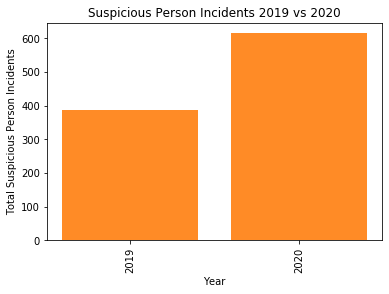

In [35]:
plt.bar(["2019","2020"], [len(suspiciousperson2019), len(suspiciousperson2020)], color='tab:orange', alpha=0.9, align="center")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Total Suspicious Person Incidents")
plt.title("Suspicious Person Incidents 2019 vs 2020")
plt.savefig('suspicious.bar.png')
plt.show()

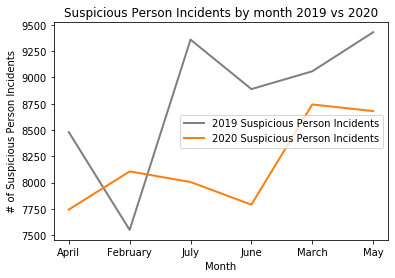

In [39]:
#Convert object occurred date to timestamp
#crime_data_df["Occurred Date"] = pd.to_datetime(crime_data_df["Occurred Date"])
#crime_data_df["Occurred Date"] = pd.arrays.DatetimeArray(crime_data_df["Occurred Date"])
suspiciousperson2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("SUSPICIOUS PERSON")]
suspiciousperson2019bymonth = crime_data_selection_months_2019.groupby("Month Occurred").count()

suspiciousperson2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("SUSPICIOUS PERSON")]
suspiciousperson2020bymonth = crime_data_selection_months_2020.groupby("Month Occurred").count()

month_order = ['February', 'March', 'April', 'May', 'June', 'July']
summary_suspiciousperson_by_month_2019 = suspiciousperson2019bymonth.reindex(month_order, axis=0)
summary_suspiciousperson_by_month_2020 = suspiciousperson2020bymonth.reindex(month_order, axis=0)

plt.plot(suspiciousperson2019bymonth,label='2019 Suspicious Person Incidents', linewidth=2,color='tab:gray')
plt.plot(suspiciousperson2020bymonth,label='2020 Suspicious Person Incidents', linewidth=2,color='tab:orange')
plt.legend()
plt.xlabel("Month")
plt.ylabel("# of Suspicious Person Incidents")
plt.title("Suspicious Person Incidents by month 2019 vs 2020")
plt.savefig('suspicious.line.png')
plt.show()

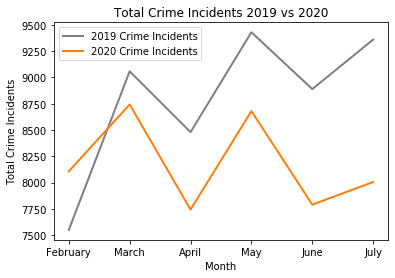

In [41]:
# Total Number of Incidents 
# Get months column and groupby for line graph 
totalincidents2019bymonth = crime_data_selection_2019["Incident Number"]
totalincidents2019bymonth = crime_data_selection_months_2019.groupby("Month Occurred").count()

totalincidents2020bymonth = crime_data_selection_2020["Incident Number"]
totalincidents2020bymonth = crime_data_selection_months_2020.groupby("Month Occurred").count()

month_order = ['February', 'March', 'April', 'May', 'June', 'July']
totalincidents_by_month_2019 = totalincidents2019bymonth.reindex(month_order, axis=0)
totalincidents_by_month_2020 = totalincidents2020bymonth.reindex(month_order, axis=0)

plt.plot(totalincidents_by_month_2019,label='2019 Crime Incidents', linewidth=2,color='tab:gray')
plt.plot(totalincidents_by_month_2020,label='2020 Crime Incidents', linewidth=2,color='tab:orange')
plt.legend()
plt.xlabel("Month")
plt.ylabel("Total Crime Incidents")
plt.title("Total Crime Incidents 2019 vs 2020")
plt.savefig('overall.line.png')
plt.show()

In [112]:
totalincidents_by_month_2019

,Highest Offense Description
Month Occurred,
February,7551
March,9058
April,8480
May,9429
June,8889
July,9359


In [113]:
totalincidents_by_month_2019.sum()

Highest Offense Description    52766
dtype: int64

In [114]:
totalincidents_by_month_2020

,Highest Offense Description
Month Occurred,
February,8107
March,8743
April,7744
May,8680
June,7791
July,8006


In [115]:
totalincidents_by_month_2020.sum()

Highest Offense Description    49071
dtype: int64

ValueError: cannot copy sequence with size 6 to array axis with dimension 1

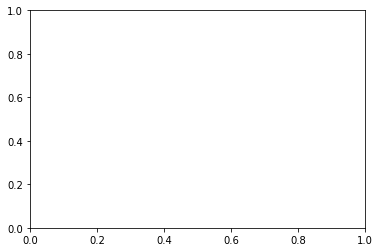

In [121]:
month_labels = ['February', 'March', 'April', 'May', 'June', 'July']
x_2019 = totalincidents_by_month_2019
x_2020 = totalincidents_by_month_2020

x = np.arange(len(month_labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [x_2019], width, label='Men')
rects2 = ax.bar(x + width/2, [x_2020], width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()